## 구글드라이브에서 코랩으로 데이터 불러오기

In [64]:
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
pwd

'/content'

In [66]:
from google.colab import files
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/a_ohson_study/Titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/a_ohson_study/Titanic/test.csv')
combine = [train_df, test_df]

## 라이브러리 설치

In [67]:
# data analysis and wrangling
'''데이터 랭글링(Data Wrangling) 혹은 데이터 먼징(Data Munging)이라고 불리는 이것은 
원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하는 것'''
import pandas as pd
import numpy as np
import random as random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 데이터 살펴보기(Describing)

In [68]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- 범주형: 'Survived', 'Sex', 'Embarked'
- 순서형: 'Pclass' (순서형 어떻게 다루는지 아래서 살펴보기)
- 연속형: 'Age', 'Fare'
- 이산형: 'SibSp', 'Parch'

칼럼 설명

1. 'PassengerId' : pass
2. 'Survived' : 0 = 사망, 1 = 생존
3. 'Pclass' : 1등석, 2등석, 3등석
4. 'Name' : 이름
5. 'Sex' : male = 남성, female = 여성
6. 'Age' : 나이
7. 'SibSp' :동승한 자매, 배우자 수
8. 'Parch': 동승한 부모, 자식 수
9. 'Ticket' : 티켓번호
10. 'Fare' : 승객 요금
11. 'Cabin' : 방 호수
12. 'Embarked' : 탑승지, C = 세르부르, Q = 퀸즈타운, S = 샤우샘프턴

In [69]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [71]:
train_df.info()
print('_'*40) # 꿀팁
test_df.info()

'''
Ticket, Cabin, Passengerid, Name은 결측치가 많거나, 고유번호나 이름이므로 생존에 영향을 미치지 않을 것이라 판단하여 drop 예정
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

'\nTicket, Cabin, Passengerid, Name은 결측치가 많거나, 고유번호나 이름이므로 생존에 영향을 미치지 않을 것이라 판단하여 drop 예정\n'

In [72]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
train_df.describe(include=['O']) # 꿀팁: 범주형 자료도 describe 가능

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


새로운 칼럼 생성
- family(Parch+SibSp)
- age: 기존의 나이를 연령대(oridinal categorical)로 표현
- fare: 유의미하면 연령대처럼 range로 나타낼 수도
- name: 어떻게 할지,,,아래서 살펴보기

분류를 위한 가설
- 여자가 더 생존할 것이다.
- 아이들이 더 생존할 것이다.
- upper-class 승객이 더 생존할 것이다.

In [74]:
# 범주형 변수 피벗테이블(pivot table)

def pivottable(data, col_list, standard): # standard: groupby의 기준이 되는 칼럼
  display(data[col_list].groupby([standard], as_index=False).mean())

In [75]:
pivottable(train_df, ['Pclass', 'Survived'], 'Pclass')
print('-'*40)
pivottable(train_df, ['Sex', 'Survived'], 'Sex')
print('-'*40)
pivottable(train_df, ['SibSp', 'Survived'], 'SibSp')
print('-'*40)
pivottable(train_df, ['Parch', 'Survived'], 'Parch')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


----------------------------------------


,Sex,Survived
0,female,0.742038
1,male,0.188908


----------------------------------------


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


----------------------------------------


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## 데이터 시각화

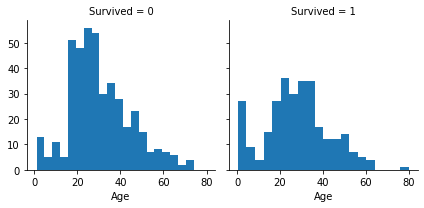

In [76]:
# 꿀팁(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# y가 범주형일 때, 특정 칼럼의 histplot
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- 생존 유무에 따른 연령 분포는 2040이 많은 것으로 비슷하나, 생존한 경우에 2040이 더 많음

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


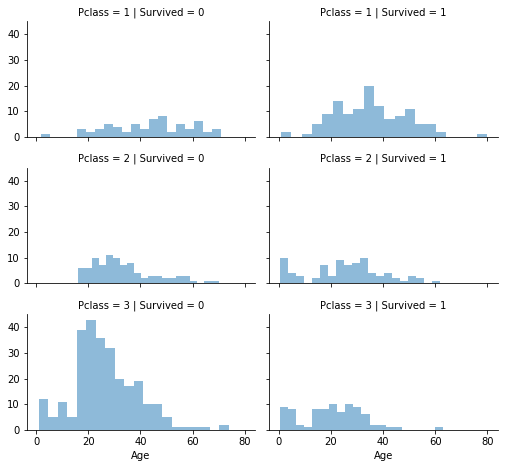

In [77]:
# 꿀팁(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# y가 순서형일 때, 특정 칼럼의 histplot
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6) # aspect은 가로
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend() # 범례 추가해주는 건데 여기선 필요없음

- 눈에 띄는 것은 사망(0)한 경우, Pclass가 3인 경우가 압도적으로 많다는 점이다.
- 사망한 경우, 3등석으로 갈수록 많아진다.
- 생존한 경우, 근소하게 1등석의 경우가 다른 등급에 비해 더 많다.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


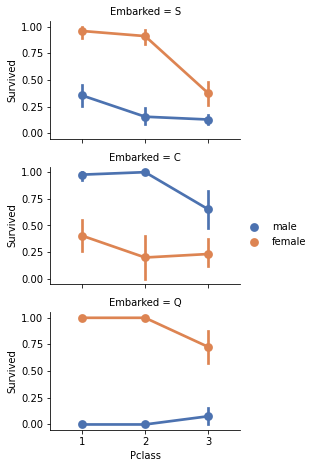

In [78]:
# 꿀팁(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# y가 순서형일 때, 특정 칼럼의 pointplot(연속형 변수와 범주형 변수의 관계를 error bar와 함께 그려주는 그래프)
grid=sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6) # col로 해도 상관없음
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep') # x축: Pclass, y축: Survived, hue: sex, 깊이는 분포를 나타냄
grid.add_legend()

- Embarked가 Q인 경우에만 여성이 생존한 경우가 더 많다.
- 전반적으로 Pclass가 1일 때, 생존한 경우가 더 많다.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


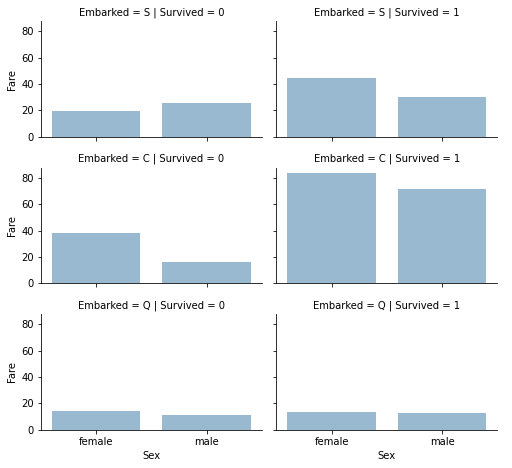

In [79]:
# 꿀팁(FacetGrid, 패싯그리드, 다중범주그래프에 유용)
# y가 순서형일 때, 특정 칼럼의 barplot
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()

- 요금을 많이 낸 승객일수록 생존한 경우가 많다.
- Embarked도 생존과 관련이 있는 듯하다. (1, 2행 그래프)

## 데이터 정리하기(Wrangle data)

In [80]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) # 꿀팁, 칼럼제거
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1) # 꿀팁, 칼럼제거
combine=[train_df, test_df] # 꿀팁, 이런 식으로 훈련, 테스트 데이터셋을 동시에 전처리 하는 거 좋은 듯

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### 이름 칼럼 그냥 버리지 않고 분석 진행함(꿀팁)

In [81]:
for dataset in combine:
  dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # 꿀팁. .으로 끝나는 단어 추출하는 정규표현식

pd.crosstab(train_df['Title'], train_df['Sex']) # 꿀팁, 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 성별을 나타내는 title이 잘 추출됨

In [82]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- Miss, Mrs가 Mr보다 확실히 생존하는 경우가 많음, 유의미한 변수로서 인정

In [83]:
# 꿀팁: 범주형 변수 인코딩(레이블링)하는 법. replace안해도됨!
title_mapping={"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
  dataset['Title']=dataset['Title'].map(title_mapping) # 핵심
  dataset['Title']=dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [84]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine=[train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 범주형 변수 인코딩 (수치 변환)

In [85]:
for dataset in combine:
  dataset['Sex']=dataset['Sex'].map( {'female':1, 'male':0}).astype(int) # 꿀팁: 형변환까지 동시에!

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 수치형, 연속형 변수 전처리 (completing)